### Exercise on Diffusion - TDMA
- Use the fully implicit scheme in
\begin{equation}
\frac{\phi^{n+1}_{j} - \phi^{n}_{j}}{\Delta t} = K \left( \frac{\phi^{n+1}_{j+1} - 2 \phi^{n+1}_{j} + \phi^{n+1}_{j-1}}{\Delta x^{2}} \right)
\end{equation}
to solve the diffusion problem in
\begin{equation}
\frac{\partial \phi}{\partial t} = K \frac{\partial^{2}\phi}{\partial x^{2}}.
\end{equation}
following the Thomas Algorithm or Tri-Diagonal Matrix Algorithm (TDMA). Use a spatial resolution of $\Delta x = 0.01\,m$ with a diffusion coefficient $K=2.9\mathrm{E}^{-5}$. Integrate for at least 6 hours and show the solution every hour. Let the initial condition be the following function, describing the temperature distribution along a $1\,m$ metal rod heated in the middle point and with extrema kept at a constant temperature of $T_0 = 273.15\,K$ (Dirichlet boundary condition):
\begin{align}
    \phi(x, 0) & = \left\{\begin{array}{ll}
      273.15+20x+\sin{(50\pi x)} \quad \mathrm{for} \quad 0 \leq x \leq 0.5 \\
      273.15+20 - 20x+\sin{(50\pi x)} \quad \mathrm{for} \quad 0.5 < x \leq 1
\end{array} \right. \\
    \phi(0, t) & = 273.15 \quad \forall t \\
    \phi(1, t) & = 273.15 \quad \forall t   
\end{align}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
class TDMAdiffusion:
    def __init__(self, K, T0, x0, x1, t0, t1, dx, dt, tp):
        self.T0 = T0
        self.x0 = x0  
        self.x1 = x1 
        self.t0 = t0
        self.t1 = t1
        self.dx = dx
        self.dt = dt
        self.tp = tp
        self.K = K
        self.nx = round((x1 - x0) / dx) + 1
        self.x = np.linspace(x0, x1, self.nx)
        self.phi = np.array([self.phi0(xi) for xi in self.x])
        self.alpha = self.K*dt/(dx**2)
        
    def phi0(self, x):
        if x >=0 and x <= 0.5:
            return self.T0 + 20*x + np.sin(50*np.pi*x)
        elif x > 0.5 and x <= 1:
            return self.T0 + 20 - 20*x + np.sin(50*np.pi*x)
        else:
            return self.T0
    

    def TDMA(self, phi_now):
        A = np.full(self.nx - 2, -self.alpha)
        C = np.full(self.nx - 2, -self.alpha)
        B = np.full(self.nx - 1, 1 + 2.0 * self.alpha)
        F = np.zeros(self.nx - 1)
        delta = np.zeros(self.nx - 1)

        F[0] = 0
        delta[0] = self.T0

        for j in range(len(C)):
            F[j + 1] = C[j] / (B[j + 1] - A[j] * F[j])
            delta[j + 1] = (phi_now[j + 1] - A[j] * delta[j]) / (B[j + 1] - A[j] * F[j])

        phi_new = np.zeros_like(phi_now)
        phi_new[self.nx - 1] = self.T0

        for j in reversed(range(len(F))):
            phi_new[j] = delta[j] - F[j] * phi_new[j + 1]

        return phi_new


    def plot(self):
        t = self.t0
        plt.plot(self.x, self.phi, label=f'$\phi$({int(t)})')
        while t < self.t1:
            phi_new = self.TDMA(self.phi)
            self.phi[:] = phi_new
            t += self.dt

            if np.mod(t, self.tp) < self.dt:
                plt.plot(self.x, self.phi, label=f'$\phi$({int(t/3600)} hr)')
        plt.xlabel('x')
        plt.ylabel('T')
        plt.suptitle(r'Tri-Diagonal Matrix Algorithm (TDMA) for solving $\quad \frac{\partial \phi}{\partial t} = K \, \frac{\partial^{2} \phi}{\partial x^{2}}$', fontsize=14)
        plt.title(rf'$\Delta t =$ {np.round(self.dt,2)}, $K =$ {self.K}')
        plt.legend(loc='upper right', fontsize='small', bbox_to_anchor=(1.25, 1))
        plt.tight_layout()  # Ensures everything fits properly
        plt.savefig(f'TDMADiffEq_dt={self.dt}.png')
        plt.show()

# Example usage:
# dt = 0.1
# dx = 0.2
# temp0 = 0.0
# K = 0.5
# solver = DiffusionSolver(dt, dx, temp0, K)
# phi_now = np.zeros(10) # Assuming some initial values for phi_now
# phi_new = solver.solve(phi_now)
# print(phi_new)


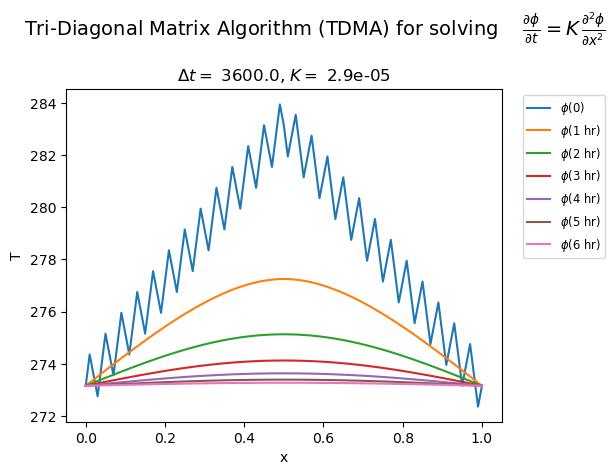

In [21]:
# Define parameters
K = 0.000029
T0 = 273.15
x0 = 0.0
x1 = 1.0
t0 = 0.0
t1 = 6*60*60
dt = 3600.0
dx = 0.01
tp = 60*60

# Create and plot
TDMAdiffusion(K, T0, x0, x1, t0, t1, dx, dt, tp).plot()